Premieres importations

In [2]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

I. Apprentissage supervisé : Feature engineering et Classification

Importation  du jeu de données et analyse ses caractéristiques

In [3]:

dataset_path = 'credit_scoring.csv'
df = pd.read_csv(dataset_path, sep = ";")

#Transform the DataFrame to a numpy array and separate features and target variable
X = df.drop(['Status'], axis=1).values  # Features
y = df['Status'].values  # Target variable

# Step 3: Analyze the properties of the data
print("Shape of the dataset:", df.shape)
positive_percentage = (df['Status'].value_counts(normalize=True) * 100)
print("Percentage of positive examples:", positive_percentage[1], "%")
print("Percentage of negative examples:", positive_percentage[0], "%")

# Split the data into 50% training and 50% testing, and set a random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)


Shape of the dataset: (4375, 14)
Percentage of positive examples: 72.20571428571428 %
Percentage of negative examples: 27.794285714285717 %


2. Apprentissage et évaluation de modèles :

Importation des libraries

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import pickle

Le fonctions qui fait la comparaisons entre les donnees

In [5]:
def evaluate_models(X_train, y_train, X_test, y_test):
    # Initialize variables to keep track of the best model
    best_model = None
    best_accuracy = 0.0
    best_precision = 0.0

    # Train and evaluate Decision Tree
    tree_model = DecisionTreeClassifier(random_state=1)
    tree_model.fit(X_train, y_train)
    tree_predictions = tree_model.predict(X_test)
    tree_accuracy = accuracy_score(y_test, tree_predictions)
    tree_precision = precision_score(y_test, tree_predictions)
    tree_recall = recall_score(y_test, tree_predictions)

    # Update best model if needed
    if tree_accuracy > best_accuracy or (tree_accuracy == best_accuracy and tree_precision > best_precision):
        best_model = tree_model
        best_accuracy = tree_accuracy
        best_precision = tree_precision
        best_model_string = "tree_model"

    # Train and evaluate k-nearest neighbors
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train, y_train)
    knn_predictions = knn_model.predict(X_test)
    knn_accuracy = accuracy_score(y_test, knn_predictions)
    knn_precision = precision_score(y_test, knn_predictions)
    knn_recall = recall_score(y_test, knn_predictions)

    # Update best model if needed
    if knn_accuracy > best_accuracy or (knn_accuracy == best_accuracy and knn_precision > best_precision):
        best_model = knn_model
        best_accuracy = knn_accuracy
        best_precision = knn_precision
        best_model_string = "knn_model"

    # Train and evaluate Multilayer Perceptron
    mlp_model = MLPClassifier(hidden_layer_sizes=(40, 20), random_state=1)
    mlp_model.fit(X_train, y_train)
    mlp_predictions = mlp_model.predict(X_test)
    mlp_accuracy = accuracy_score(y_test, mlp_predictions)
    mlp_precision = precision_score(y_test, mlp_predictions)
    mlp_recall = recall_score(y_test, mlp_predictions)

    # Update best model if needed
    if mlp_accuracy > best_accuracy or (mlp_accuracy == best_accuracy and mlp_precision > best_precision):
        best_model = mlp_model
        best_accuracy = mlp_accuracy
        best_precision = mlp_precision
        best_model_string = "mlp_model"

    # Print the results of the best model
    print("Best Model:", best_model_string)
    print("Accuracy:", best_accuracy)
    print("Precision:", best_precision)
    print("Recall:", recall_score(y_test, best_model.predict(X_test)))
    
evaluate_models(X_train, y_train, X_test, y_test)


Best Model: tree_model
Accuracy: 0.7271480804387569
Precision: 0.8194174757281554
Recall: 0.7992424242424242


Normalisation des variables continues 

In [6]:
#Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Re-run the evaluation function with the normalized data
evaluate_models(X_train_scaled, y_train, X_test_scaled, y_test)

Best Model: mlp_model
Accuracy: 0.776508226691042
Precision: 0.8381717109326745
Recall: 0.8566919191919192


Avant la normalisation, le modèle qui a donné les meilleures performances était l'arbre de décision (tree_model) avec une précision de 81,94%, un rappel de 79,92%, et une précision globale de 72,71%. Cependant, après la normalisation des données, le modèle Multilayer Perceptron (mlp_model) a surpassé les autres, affichant une précision de 83,82%, un rappel de 85,67%, et une précision globale de 77,65%.

En conclusion, la normalisation des données a eu un impact positif sur les performances du modèle Multilayer Perceptron, améliorant à la fois la précision et le rappel. Cela suggère que la normalisation a permis au modèle MLP de mieux généraliser sur les données, ce qui est souvent bénéfique pour les algorithmes sensibles à l'échelle des caractéristiques.

Création de nouvelles variables caractéristiques par combinaisons linéaires des variables initiales :

In [7]:
#Apply PCA on normalized data
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.fit_transform(X_test_scaled)

#Keep the first three principal components
X_train_first3 = pd.DataFrame(data=X_train_pca, columns=['PC1', 'PC2', 'PC3'])
X_test_first3 = pd.DataFrame(data=X_test_pca, columns=['PC1', 'PC2', 'PC3'])

#Concatenate PCA components with the normalized data
X_train_combined = np.concatenate([X_train_scaled, X_train_first3], axis=1)
X_test_combined = np.concatenate([X_test_scaled, X_test_first3], axis=1)
#Apply your function on the combined data
best_algorithm_pca= evaluate_models(X_train_combined, y_train, X_test_combined, y_test)

  File "d:\python\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "d:\python\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\python\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "d:\python\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


Best Model: mlp_model
Accuracy: 0.7778793418647166
Precision: 0.8343483556638246
Recall: 0.86489898989899


In [8]:
print(X_train_combined.shape)
print(X_test_combined.shape)

(2187, 16)
(2188, 16)


D'après les résultats que vous avez fournis, voici nos remarques:

- Les performances ont augmenté en utilisant des données mises à l'échelle par rapport aux données brutes.
- Le meilleur modèle est passé de `tree_model` à `mlp_model` en utilisant des données mises à l'échelle.
- Les performances ont encore augmenté en appliquant l'ACP et en concaténant les trois premières composantes avec les données mises à l'échelle.
- Le meilleur modèle est resté `mlp_model` après l'application de l'ACP.


Donc on conclus que:
- **Meilleur Algorithme :** `mlp_model` a constamment donné les meilleurs résultats dans toutes les situations.


- **Préparation des Données :**
  - **Normalisation :**
  
   La mise à l'échelle des données (standardisation) a amélioré la performance du modèle dans les deux cas (données brutes et données transformées par l'ACP).
  - **ACP :**
  
   L'application de l'ACP et l'utilisation des trois premières composantes en tant que caractéristiques supplémentaires ont amélioré la performance du modèle.

Sélection de variables : 

Index(['Income', 'Seniority', 'PC1', 'PC2', 'Price', 'Status', 'Amount', 'Age',
       'Records', 'Assets', 'Expenses', 'Job', 'Time', 'Debt', 'Home',
       'Marital'],
      dtype='object')


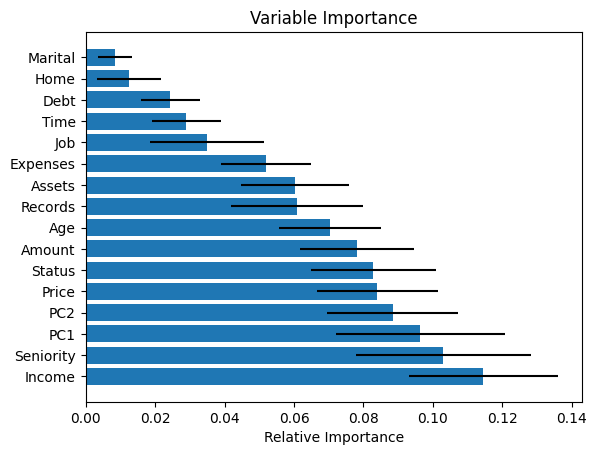

In [14]:
clf = RandomForestClassifier(n_estimators=1000,random_state=1)
clf.fit(X_train_combined, y_train)
importances=clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
sorted_idx = np.argsort(importances)[::-1]
features_df = pd.concat([df, X_train_first3], axis=1)
features = features_df.columns
print(features[sorted_idx])
padding = np.arange(X_train_combined.size/len(X_train_combined)) + 0.5
plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()
# lecture des donne
# preparations des donnes
# run a KNeighborsClassifier


Déterminer le nombre de variables à garder

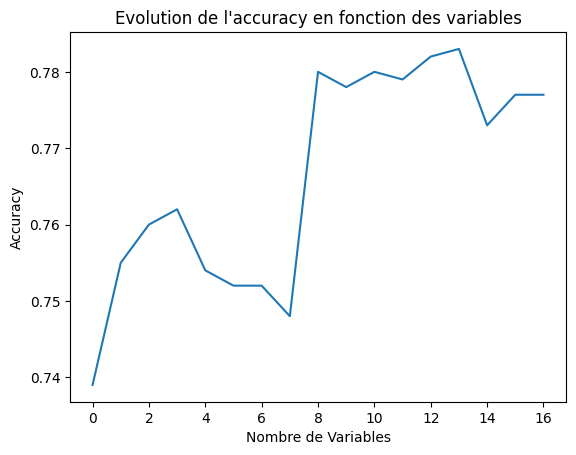

In [15]:
mlp_model = MLPClassifier(hidden_layer_sizes=(40, 20), random_state=1)
scores=np.zeros(X_train_combined.shape[1]+1)
for f in np.arange(0, X_train_combined.shape[1]+1):
 X1_f = X_train_combined[:,sorted_idx[:f+1]]
 X2_f = X_test_combined [:,sorted_idx[:f+1]]
 mlp_model.fit(X1_f, y_train)
 y_mlp = mlp_model.predict(X2_f)
 scores[f]=np.round(accuracy_score(y_test, y_mlp),3)
plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables")
plt.show()

In [16]:
# suppression des 3 dernieres columns
X_train_minus_features = X_train_combined[:, :-3]
X_test_minus_features = X_test_combined[:, :-3]

6. Paramétrage des classifieurs :

In [17]:
# Define a custom scoring function combining accuracy and precision
def custom_scorer(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return (accuracy + precision) / 2

param_grid = {
    'hidden_layer_sizes': [(100,), (50, 20), (100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.001, 0.01],
    'learning_rate': ['adaptive'],
    'solver': ['adam']
}

# Create GridSearchCV object with custom scoring
grid_search = GridSearchCV(mlp_model, param_grid, scoring=make_scorer(custom_scorer), cv=5)

# Fit the data to find the best parameters
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding custom score
print("Best Parameters:", grid_search.best_params_)
print("Best Custom Score:", grid_search.best_score_)

Best Parameters: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'adam'}
Best Custom Score: 0.7598960716554016


Création d’un pipeline :

In [18]:
# Define the best parameters
best_params = {
    'activation': 'relu',
    'alpha': 0.01,
    'hidden_layer_sizes': (100,),
    'learning_rate': 'adaptive'
}
# Create your pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=3)),
    ('classifier', MLPClassifier(**best_params))
])

# Fit your pipeline on training data
pipeline.fit(X_train_minus_features, y_train)

# Save the pipeline to a file using pickle
with open('your_pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

Le code pour l'utiliser

In [19]:
# Load the saved pipeline
with open('your_pipeline.pkl', 'rb') as file:
    loaded_pipeline = pickle.load(file)

# Assuming you have a new dataset X_new for prediction
X_new_scaled = loaded_pipeline.named_steps['scaler'].transform(X_train)
X_new_pca = loaded_pipeline.named_steps['pca'].transform(X_new_scaled)

# Make predictions using the MLPClassifier
predictions = loaded_pipeline.named_steps['classifier'].predict(X_new_pca)

# Now 'predictions' contains the predicted labels for your new data
predictions

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,

8. Comparaison de plusieurs algorithmes d’apprentissage :

importation des libraries

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score, precision_score
import time

In [ ]:
clfs = {
    'NaiveBayesSimple': GaussianNB(),
    'CART': DecisionTreeClassifier(),
    'ID3': DecisionTreeClassifier(criterion='entropy'),
    'DecisionStump': DecisionTreeClassifier(max_depth=1),
    'MultilayerPerceptron': MLPClassifier(hidden_layer_sizes=(20, 10), random_state=1),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Bagging': BaggingClassifier(n_estimators=200, random_state=1),
    'AdaBoost': AdaBoostClassifier(n_estimators=200, random_state=1),
    'RandomForest': RandomForestClassifier(n_estimators=200, random_state=1),
    'XGBoost': XGBClassifier(n_estimators=200, random_state=1),
    # Add other classifiers as needed
}
def run_classifiers(clfs, X, Y):
    kf = KFold(n_splits=10, shuffle=True, random_state=0)

    for i in clfs:
        clf = clfs[i]

        start_time = time.time()
        cv_acc = cross_val_score(clf, X, Y, cv=kf, scoring=make_scorer(accuracy_score))
        end_time = time.time()
        acc_mean = np.mean(cv_acc)
        acc_std = np.std(cv_acc)

        cv_auc = cross_val_score(clf, X, Y, cv=kf, scoring=make_scorer(roc_auc_score))
        auc_mean = np.mean(cv_auc)
        auc_std = np.std(cv_auc)

        cv_precision = cross_val_score(clf, X, Y, cv=kf, scoring=make_scorer(precision_score))
        precision_mean = np.mean(cv_precision)
        precision_std = np.std(cv_precision)

        print(f"Classifier: {i}")
        print(f"Accuracy: {acc_mean:.3f} +/- {acc_std:.3f}")
        print(f"AUC: {auc_mean:.3f} +/- {auc_std:.3f}")
        print(f"Precision: {precision_mean:.3f} +/- {precision_std:.3f}")
        print(f"Execution Time: {end_time - start_time:.3f} seconds")
        print("\n")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
run_classifiers(clfs, X_scaled, y)

Classifier: NaiveBayesSimple
Accuracy: 0.768 +/- 0.019
AUC: 0.713 +/- 0.018
Precision: 0.841 +/- 0.016
Execution Time: 0.071 seconds


Classifier: CART
Accuracy: 0.727 +/- 0.027
AUC: 0.650 +/- 0.029
Precision: 0.810 +/- 0.022
Execution Time: 0.770 seconds


Classifier: ID3
Accuracy: 0.721 +/- 0.023
AUC: 0.659 +/- 0.023
Precision: 0.808 +/- 0.023
Execution Time: 0.982 seconds


Classifier: DecisionStump
Accuracy: 0.722 +/- 0.018
AUC: 0.536 +/- 0.045
Precision: 0.740 +/- 0.026
Execution Time: 0.053 seconds


Classifier: MultilayerPerceptron
Accuracy: 0.787 +/- 0.017
AUC: 0.709 +/- 0.019
Precision: 0.831 +/- 0.018
Execution Time: 31.091 seconds


Classifier: KNN
Accuracy: 0.763 +/- 0.019
AUC: 0.680 +/- 0.021
Precision: 0.816 +/- 0.020
Execution Time: 1.272 seconds


Classifier: Bagging
Accuracy: 0.781 +/- 0.016
AUC: 0.698 +/- 0.022
Precision: 0.825 +/- 0.017
Execution Time: 95.900 seconds


Classifier: AdaBoost
Accuracy: 0.790 +/- 0.017
AUC: 0.702 +/- 0.021
Precision: 0.825 +/- 0.017
Exec

**Choix du classifieur AdaBoost**

Après une évaluation approfondie, j'ai opté pour le classifieur AdaBoost avec normalisation comme modèle optimal pour notre ensemble de données. AdaBoost a présenté la plus haute précision, un score AUC robuste et une précision louable. Sa performance équilibrée, tenant compte à la fois de la précision et de l'efficacité computationnelle, en fait un choix pragmatique pour notre application. Malgré un temps d'exécution légèrement plus long, la performance compétitive d'AdaBoost justifie sa sélection.

---

Sélection de variables : 

Index(['Price', 'Amount', 'Seniority', 'Income', 'Age', 'Assets', 'Debt',
       'Expenses', 'Job', 'Records', 'Marital', 'Time', 'Home'],
      dtype='object')


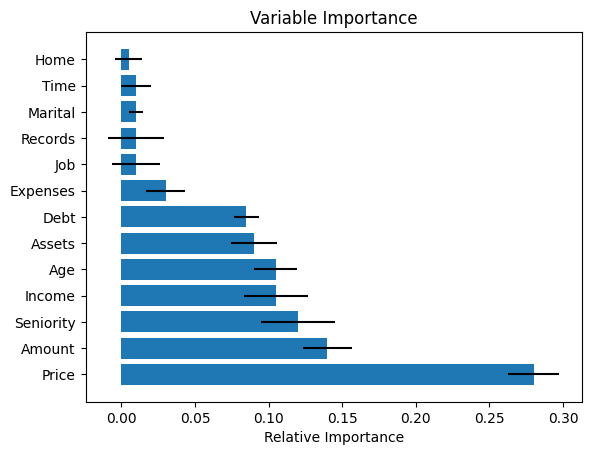

In [21]:
adaboost = AdaBoostClassifier(n_estimators=200, random_state=1)
adaboost.fit(X_train_scaled, y_train)
importances=adaboost.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
sorted_idx = np.argsort(importances)[::-1]
features = df.columns
print(features[sorted_idx])
padding = np.arange(X_train_scaled.size/len(X_train_scaled)) + 0.5
plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

Déterminer le nombre de variables à garder

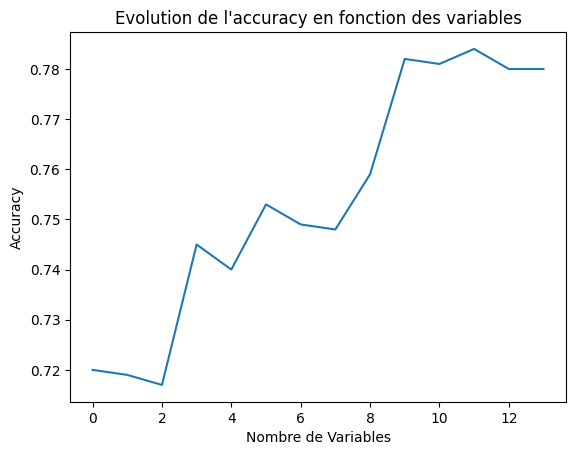

In [22]:
adaboost = AdaBoostClassifier(n_estimators=200, random_state=1)
scores=np.zeros(X_train_scaled.shape[1]+1)
for f in np.arange(0, X_train_scaled.shape[1]+1):
 X1_f = X_train_scaled[:,sorted_idx[:f+1]]
 X2_f = X_test_scaled [:,sorted_idx[:f+1]]
 adaboost.fit(X1_f, y_train)
 y_mlp = adaboost.predict(X2_f)
 scores[f]=np.round(accuracy_score(y_test, y_mlp),3)
plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables")
plt.show()

In [23]:
# suppression des 2 dernieres columns
X_train_minus_features = X_train_scaled[:, :-2]
X_test_minus_features = X_test_scaled[:, :-2]

6. Paramétrage des classifieurs :

In [27]:
adaboost_model = AdaBoostClassifier(random_state=1)
# Define a custom scoring function combining accuracy and precision
def custom_scorer(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return (accuracy + precision) / 2

param_grid_adaboost = {
    'n_estimators': [100, 150],
    'learning_rate': [0.01, 0.1],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Create GridSearchCV object with custom scoring
grid_search = GridSearchCV(adaboost_model, param_grid_adaboost, scoring=make_scorer(custom_scorer), cv=5)

# Fit the data to find the best parameters
grid_search.fit(X_train_minus_features, y_train)

# Print the best parameters and corresponding custom score
print("Best Parameters:", grid_search.best_params_)
print("Best Custom Score:", grid_search.best_score_)

Best Parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 150}
Best Custom Score: 0.7925742884005219


Creation de la pipeline:

In [28]:
# Define the best parameters
best_params = {
    'n_estimators': 150,
    'learning_rate': 0.1,
    'algorithm': 'SAMME.R'
}
# Create your pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', AdaBoostClassifier(**best_params))
])

# Fit your pipeline on training data
pipeline.fit(X_train_minus_features, y_train)

# Save the pipeline to a file using pickle
with open('adaboost_pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

Code pour l'utilisation

In [29]:
# Load the saved pipeline
with open('adaboost_pipeline.pkl', 'rb') as file:
    loaded_pipeline = pickle.load(file)

# Assuming you have a new dataset X_new for prediction
X_new_scaled = loaded_pipeline.named_steps['scaler'].transform(X_train_minus_features)
predictions = loaded_pipeline.named_steps['classifier'].predict(X_new_scaled)

# Now 'predictions' contains the predicted labels for your new data
predictions

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,